In [1]:
using CABLAB

In this Notebook we want to visualize the regions where cube variable take on their highest or lowest value. To do this we calculate the 99% and the 1% quantile for each variable from a subset of the data and afterwards count how often the quantile was exceeded for each variable in each grid cell.

In [2]:
c             = Cube("/Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res/")
vars          = ["air_temperature_2m","soil_moisture","c_emissions"];
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,40),variable=vars); 
sampledata=sampleLandPoints(cdata,2000);

Get the quantiles for the subsample

In [3]:
quants=mapCube(timespacequantiles,sampledata,[0.01,0.99])

In-Memory data cube with the following dimensions
Quantile            Axis with elements: 0.01 0.99 
Variable            Axis with elements: air_temperature_2m soil_moisture c_emissions 


Define a function that counts quantile crossings for each grid cell

In [4]:
"""
How often the upper or lower quantiles are crossed in each time series
"""
function countExtremes(xout::AbstractArray,xin::AbstractVector,qvec::AbstractVector)
    nlow,nhigh=0,0
    qlow,qhigh=qvec
    for v in xin
        if !isnan(v)
            v<=qlow && (nlow+=1)
            v>=qhigh && (nhigh+=1)
        end
    end
    xout[1]=nlow
    xout[2]=nhigh
end

registerDATFunction(countExtremes,((TimeAxis,),(QuantileAxis,)),(QuantileAxis,),inmissing=(:nan,:nan),outmissing=:nan,no_ocean=1);

In [5]:
@time o=mapCube(countExtremes,(cdata,quants),outtype=Int, no_ocean=true)

 11.157569 seconds (8.43 M allocations: 721.322 MB, 4.07% gc time)


In-Memory data cube with the following dimensions
Quantile            Axis with elements: 0.01 0.99 
Lon                 Axis with 200 Elements from -10.0 to 39.75
Lat                 Axis with 140 Elements from 65.0 to 30.25
Variable            Axis with elements: air_temperature_2m soil_moisture c_emissions 


Now we plot the low extremes

"air_temperature_2m"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
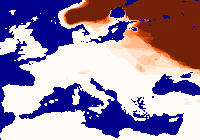

"soil_moisture"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
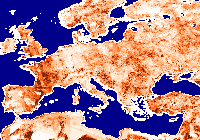

"c_emissions"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
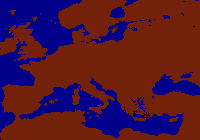

In [6]:
for i=1:3
display(o.axes[4].values[i])
display(plotMAP(o,dmax=10,quant=1,var=i))
end

And the high extremes

"air_temperature_2m"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
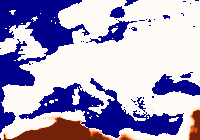

"soil_moisture"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
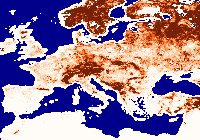

"c_emissions"

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 
 
 
 
 0.0 
 2.0 
 4.0 
 6.0 
 8.0 
 10.0
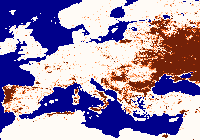

In [7]:
for i=1:3
display(o.axes[4].values[i])
display(plotMAP(o,dmax=10,quant=2,var=i))
end